In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install vaderSentiment
! pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=2720fa92e9def630554def3442a8cd3f640770a9e47cf1b5f210968b37e9106d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
from tabulate import tabulate
from langdetect import detect
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import matplotlib.pyplot as plt
import re
import os
import pandas as pd
import numpy as np
from gensim.models import FastText
from collections import Counter
from gensim.models import Phrases
import nltk
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns

from sklearn.metrics import recall_score, confusion_matrix,f1_score,precision_score,classification_report
import itertools
import collections
import pickle
from sklearn import feature_extraction
from collections import defaultdict
import warnings
from sklearn.metrics import roc_curve, auc
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.utils import resample
import json

In [ ]:
def load_data(path):
    data = pd.read_csv(path)
    return data

In [ ]:
imdb_df = load_data("/content/drive/MyDrive/ABSA_FYP_V3/Top_20_K_Movies.csv")
imdb_df.head()

,Title,helpfulVotes,isSpoiler,link,rating,reviewDate,reviewText,reviewTitle,totalVotes,userName,userProfileUrl
0,Burning (2018),456,False,https://imdb.com/review/rw4661392/?ref_=tt_urv,8.0,16-Feb-19,A thriller about a missing person. An allegory of class division. A study of generational aliena...,"A slow-burning mystery about economics, class, and sexual jealousy. And cats.",561,Bertaut,https://imdb.com/user/ur0277234/?ref_=tt_urv
1,Burning (2018),213,False,https://imdb.com/review/rw4625269/?ref_=tt_urv,9.0,04-Feb-19,"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ...",Burning questions,272,gizmomogwai,https://imdb.com/user/ur11489906/?ref_=tt_urv
2,Burning (2018),34,False,https://imdb.com/review/rw5551368/?ref_=tt_urv,9.0,14-Mar-20,"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p...","Brilliant, but be patient with it",45,gbill-74877,https://imdb.com/user/ur66111139/?ref_=tt_urv
3,Burning (2018),121,False,https://imdb.com/review/rw4503774/?ref_=tt_urv,7.0,09-Dec-18,"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A...",Fascinating but maybe over-rated,177,proud_luddite,https://imdb.com/user/ur83918359/?ref_=tt_urv
4,Burning (2018),61,False,https://imdb.com/review/rw4631276/?ref_=tt_urv,8.0,07-Feb-19,It's the rare film that gets its value upon reflection rather than during watching. It's not bor...,The rare film that gets its value upon reflection.,81,domtaylor,https://imdb.com/user/ur26820808/?ref_=tt_urv


In [ ]:
tiktok_df = load_data("/content/drive/MyDrive/ABSA_FYP_V3/TikTok_Dataset.csv")
tiktok_df.head()

,Title,text,diggCount,replyCommentTotal,createTimeISO,uniqueId,videoWebUrl,uid,cid
0,Burning (2018),It’s dead feel 3 days long😭,236,3.0,2020-07-31T20:15:42.000Z,sc_ar13,https://www.tiktok.com/@marcogennuso/video/6855733259297492229,6.777967e+18,6.855741e+18
1,Burning (2018),LMAO 😂🤷🏻‍♂️,27,NaN,2020-07-31T20:17:21.000Z,marcogennuso,https://www.tiktok.com/@marcogennuso/video/6855733259297492229,6.791248e+18,6.855741e+18
2,Burning (2018),"it’s SO SLOW BUT I LOVE IT! each scene is like 10-20 minutes, minimum, and it WORKS imo!",137,0.0,2020-08-01T00:40:04.000Z,buttcrackson,https://www.tiktok.com/@marcogennuso/video/6855733259297492229,6.624318e+18,6.855809e+18
3,Burning (2018),I like you are going through Yoo Ah In’s stuff. He’s an amazing actor with tremendous charisma 🤩,69,0.0,2020-08-01T09:55:38.000Z,anneliesdhondt,https://www.tiktok.com/@marcogennuso/video/6855733259297492229,6.709852e+18,6.855952e+18
4,Burning (2018),When you grew up watching period dramas so slow movies are right up your ally,44,1.0,2020-08-02T02:42:57.000Z,urfavsofie,https://www.tiktok.com/@marcogennuso/video/6855733259297492229,6.779415e+18,6.856212e+18


In [ ]:
insta_df = load_data("/content/drive/MyDrive/ABSA_FYP_V3/Insta_Dataset.csv")
insta_df.head()

,Title,Caption
0,Decision to Leave (2022),I haven’t seen you in a long time.---\n#BurberryRose\n#tangwei #2023 #탕웨이 #湯唯 #汤唯 #タン・ウェイ #charl...
1,Decision to Leave (2022),#DecisionToLeave ▫️Homme fatale.\n▪️\n▪️\n▪️\n#ParkHaeIl #TangWei #ParkChanWook #HeojilKyolshim ...
2,Decision to Leave (2022),tang wei~Presentation of Urban Simple British Style\n#tangwei #2023 #탕웨이 #湯唯 #汤唯 #タン・ウェイ #charlo...
3,Decision to Leave (2022),My collection 番外編\n🎥別れる決心🎞️\n#decisiontoleave #別れる決心 #韓国映画 #🇰🇷 #カンヌ国際映画祭 #監督賞 #🎞 #cannesinternat...
4,Decision to Leave (2022),"“The moment you said you loved me, your love ended. And the moment your love ended, my love bega..."


In [ ]:
dfShape = [
    ('IMDB', imdb_df.shape),
    ('Tiktok', tiktok_df.shape),
    ('Insta', insta_df.shape)
]

table_data = [{'Data Sources': name, 'shape': shape} for name, shape in dfShape]
print(tabulate(table_data, headers="keys", tablefmt="pretty"))


+--------------+-------------+
| Data Sources |    shape    |
+--------------+-------------+
|     IMDB     | (10634, 11) |
|    Tiktok    |  (3139, 9)  |
|    Insta     |  (6943, 2)  |
+--------------+-------------+


In [ ]:
dfTypes = [
    ('IMDB', imdb_df.dtypes.to_dict()),
    ('Tiktok', tiktok_df.dtypes.to_dict()),
    ('Insta', insta_df.dtypes.to_dict())
]

table_data = [{'Data Sources': name, 'dtypes': dtypes} for name, dtypes in dfTypes]
print(tabulate(table_data, headers="keys", tablefmt="pretty"))

+--------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Data Sources |                                                                                                                                                dtypes                                                                                                                                                |
+--------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|     IMDB     | {'Title': dtype('O'), 'helpfulVotes': dtype('in

### Data Preprocessing
- Filter out duplicate data based on review
- Only consider english review
- Only consider helpfulness vote that 80% people agree (For IMDB)

In [ ]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [ ]:
def filter_data(dataSource, dataName):
    df = dataSource
    duplicate_count = df[df.duplicated()].shape[0]
    print("Number of Duplicate Rows:", duplicate_count)
    filtered_df = df.drop_duplicates()

    if dataName == "imdb":
        filtered_df['is_english'] = filtered_df['reviewText'].apply(is_english)
        filtered_df = filtered_df[filtered_df['is_english']]
        print("Number of Non-English Rows:", df.shape[0] - filtered_df.shape[0])
        helpfulness_count = filtered_df[(filtered_df['helpfulVotes'] / filtered_df['totalVotes']) < 0.8].shape[0]
        print("Number of Non Helpful Rows:", filtered_df.shape[0] - helpfulness_count)
        filtered_df = filtered_df[(filtered_df['helpfulVotes'] / filtered_df['totalVotes']) < 0.8]

    if dataName == "tiktok":
        filtered_df['is_english'] = filtered_df['text'].apply(is_english)
        filtered_df = filtered_df[filtered_df['is_english']]
        print("Number of Non-English Rows:", df.shape[0] - filtered_df.shape[0])

    if dataName == "insta":
        filtered_df['is_english'] = filtered_df['Caption'].apply(is_english)
        filtered_df = filtered_df[filtered_df['is_english']]
        print("Number of Non-English Rows:", df.shape[0] - filtered_df.shape[0])

    print("Number of Initial Rows:", df.shape[0])
    print("Number of Filtered Rows:", filtered_df.shape[0])

    return filtered_df

In [ ]:
imdb_filtered_df = filter_data(imdb_df, "imdb")

Number of Duplicate Rows: 0
Number of Non-English Rows: 19
Number of Non Helpful Rows: 2122
Number of Initial Rows: 10634
Number of Filtered Rows: 8493


In [ ]:
tiktok_filtered_df = filter_data(tiktok_df, "tiktok")

Number of Duplicate Rows: 25
Number of Non-English Rows: 1785
Number of Initial Rows: 3139
Number of Filtered Rows: 1354


In [ ]:
insta_filtered_df = filter_data(insta_df, "insta")

Number of Duplicate Rows: 619
Number of Non-English Rows: 2388
Number of Initial Rows: 6943
Number of Filtered Rows: 4555


In [ ]:
#Combine 3 data sources
imdb_filtered_df = imdb_filtered_df[["Title", "reviewText"]]
tiktok_filtered_df = tiktok_filtered_df[["Title", "text"]]
insta_filtered_df = insta_filtered_df[["Title", "Caption"]]

# Rename the columns
imdb_filtered_df.columns = ["Title", "review"]
tiktok_filtered_df.columns = ["Title", "review"]
insta_filtered_df.columns = ["Title", "review"]

data = pd.concat([imdb_filtered_df, tiktok_filtered_df, insta_filtered_df], ignore_index=True)

data.head()

,Title,review
0,Burning (2018),"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ..."
1,Burning (2018),"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p..."
2,Burning (2018),"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A..."
3,Burning (2018),It's the rare film that gets its value upon reflection rather than during watching. It's not bor...
4,Burning (2018),Wow. Didn't do it for me. Characters were bland. Story was bland. Pacing was plodding and slow. ...


In [ ]:
data.shape

(14402, 2)

### EDA

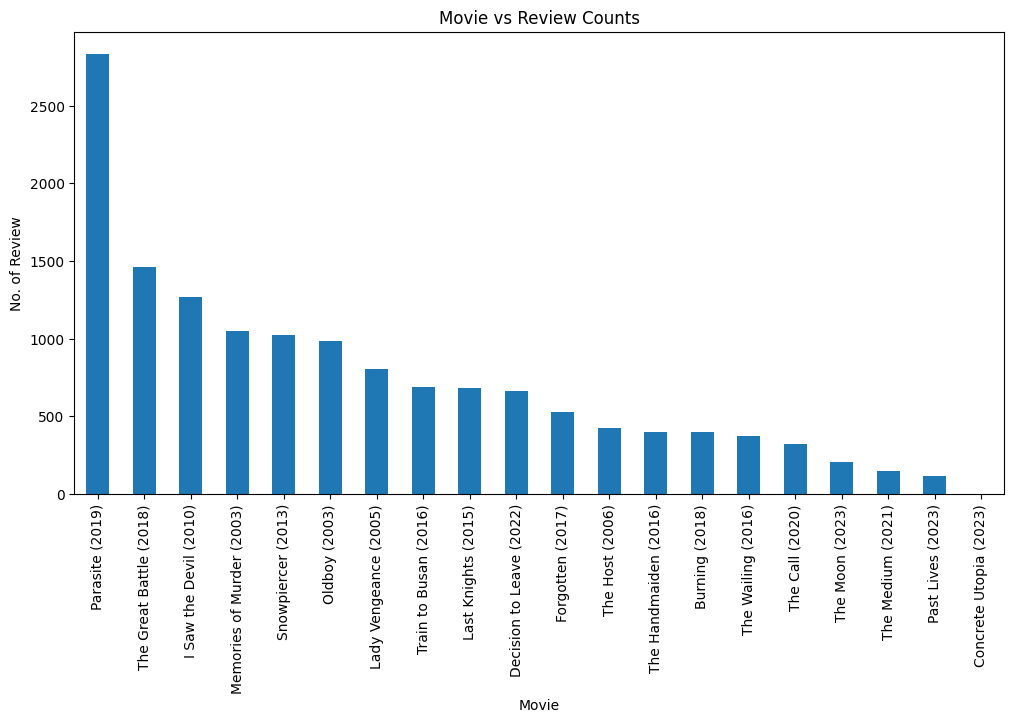

In [ ]:
# EDA of review count based on movies
title_counts = data['Title'].value_counts()

title_counts = title_counts.sort_values(ascending=False)

# Plot a bar chart
plt.figure(figsize=(12, 6))
title_counts.plot(kind='bar')
plt.title('Movie vs Review Counts')
plt.xlabel('Movie')
plt.ylabel('No. of Review')
plt.show()

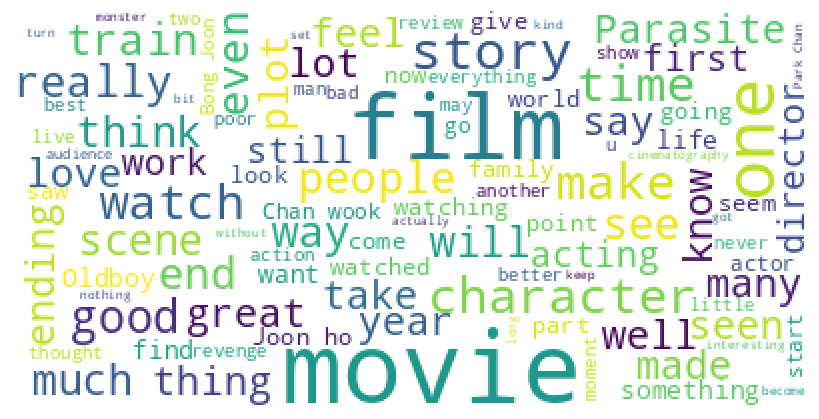

In [ ]:
# Concatenate all the text from the 'review' column
text = ' '.join(data['review'])

# Generate the word cloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Data Cleaning

In [ ]:
# remove url
remove_url = lambda x: re.sub(r'https?://\S+|www\.\S+',' ',x)

# remove non alphabets
remove_non_alphabets = lambda x: re.sub(r'[^a-zA-Z]',' ',x)

# token alphabets-only list
tokenize = lambda x: word_tokenize(x)

nltk.download('stopwords')
stop_words=stopwords.words('english')

lemmatizer = WordNetLemmatizer()
lemmtizer = lambda x: [ lemmatizer.lemmatize(word) for word in x if word not in stop_words]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
data['Content_clean'] = data['review'].apply(remove_non_alphabets)
data['Content_clean']=data['Content_clean'].apply(remove_url)
data['Content_clean']=data['Content_clean'].apply(tokenize)
data['Content_clean'] = data['Content_clean'].apply(lemmtizer)
data['Content_clean']= data['Content_clean'].apply(lambda x: ' '.join(x))
data['Content_clean']= data['Content_clean'].str.lower()

data.head()

,Title,review,Content_clean
0,Burning (2018),"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ...",burning fipresci prize winning film south korea mysterious quality romantic drama thriller also ...
1,Burning (2018),"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p...",jeon jong seo play hae mi really beautiful moment film including pantomime routine mimicking gre...
2,Burning (2018),"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A...",based short story barn burning haruki murakami paju south korea jong su yoo ah young aspiring wr...
3,Burning (2018),It's the rare film that gets its value upon reflection rather than during watching. It's not bor...,it rare film get value upon reflection rather watching it boring extremely long runtime generall...
4,Burning (2018),Wow. Didn't do it for me. Characters were bland. Story was bland. Pacing was plodding and slow. ...,wow didn characters bland story bland pacing plodding slow i know i going grain something defini...


In [ ]:
#Test on the analyzer output
analyzer = SentimentIntensityAnalyzer()

# Define the input text
text = "The bread is top notch as well but the price is not worth"
nlp = spacy.load("en_core_web_sm")

sentiment_scores = analyzer.polarity_scores(text)
sentiment_scores

{'neg': 0.134, 'neu': 0.669, 'pos': 0.197, 'compound': -0.0127}

In [ ]:
#Test on the SpaCy output

text = "I felt compelled to write a review based on the negative comments. I watched this over the course of a day and a half and thought it was very good. Now I understand that not everyone will enjoy the same types of shows but in no sane world is this show a 1-4.For the reviewers that only made it through 2-3 episodes you missed the jump in the timeline. For the reviewers complaining about a lack of closure after six episodes, well thats because there will be a second season. It's a cliffhanger pretty standard.I would recommend giving it a go. In my opinion it is better than most of what Hollywood has been putting out for years."
doc = nlp(text)
# Iterate through tokens and assign tags, polarities, and aspects
aspects=[]
for token in doc:

    # Check if the token is a noun and has a related adjective (potential aspect)
    if token.pos_ == "NOUN":
        for child in token.children:
            if child.pos_ == "ADJ":
                #aspects.append((token.text, child.text))
                aspects+=[token.text, child.text]
aspects

['comments', 'negative', 'types', 'same', 'world', 'sane', 'season', 'second']

In [ ]:
def get_labels(x):
  sentiment_scores = analyzer.polarity_scores(x)
  com=sentiment_scores['compound']
  #Positive
  if com>=0.05:
    return 2
  #Neutral
  if com>-0.05 and com<0.05:
    return 1
  #Negative
  if com<=-0.05:
    return 0

data['label']=data['Content_clean'].apply(get_labels)
data.head()


,Title,review,Content_clean,label
0,Burning (2018),"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ...",burning fipresci prize winning film south korea mysterious quality romantic drama thriller also ...,2
1,Burning (2018),"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p...",jeon jong seo play hae mi really beautiful moment film including pantomime routine mimicking gre...,2
2,Burning (2018),"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A...",based short story barn burning haruki murakami paju south korea jong su yoo ah young aspiring wr...,2
3,Burning (2018),It's the rare film that gets its value upon reflection rather than during watching. It's not bor...,it rare film get value upon reflection rather watching it boring extremely long runtime generall...,2
4,Burning (2018),Wow. Didn't do it for me. Characters were bland. Story was bland. Pacing was plodding and slow. ...,wow didn characters bland story bland pacing plodding slow i know i going grain something defini...,2


In [ ]:
def get_aspect(text):
  doc = nlp(text)
  # Iterate through tokens and assign tags, polarities, and aspects
  aspects=[]
  for token in doc:

      # Check if the token is a noun and has a related adjective (potential aspect)
      if token.pos_ == "NOUN":
          for child in token.children:
              if child.pos_ == "ADJ":
                  #aspects.append((token.text, child.text))
                  aspects+=[token.text, child.text]
  return ' '.join(aspects)


data['aspect']=data['Content_clean'].apply(get_aspect)
data.head()

,Title,review,Content_clean,label,aspect
0,Burning (2018),"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ...",burning fipresci prize winning film south korea mysterious quality romantic drama thriller also ...,2,quality mysterious thriller romantic film understated moment simple solution simple solution str...
1,Burning (2018),"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p...",jeon jong seo play hae mi really beautiful moment film including pantomime routine mimicking gre...,2,film beautiful routine pantomime hunger great concept poetic people young parent difficult world...
2,Burning (2018),"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A...",based short story barn burning haruki murakami paju south korea jong su yoo ah young aspiring wr...,2,story short writer young job odd classmate former character unusual path mysterious hour half po...
3,Burning (2018),It's the rare film that gets its value upon reflection rather than during watching. It's not bor...,it rare film get value upon reflection rather watching it boring extremely long runtime generall...,2,film rare runtime long risk dull mystery pure progress narrative intrigue intriguing finale last...
4,Burning (2018),Wow. Didn't do it for me. Characters were bland. Story was bland. Pacing was plodding and slow. ...,wow didn characters bland story bland pacing plodding slow i know i going grain something defini...,2,


In [ ]:
data['label'].value_counts()

2    8687
0    3555
1    2160
Name: label, dtype: int64

**EDA**

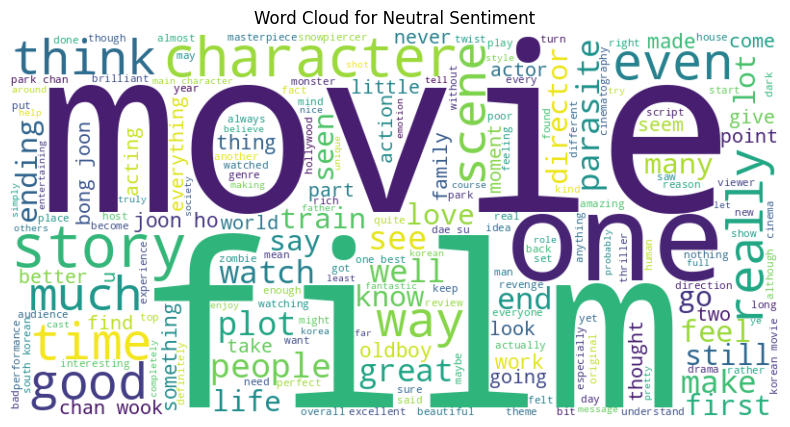

Top Words for Neutral Sentiment:
i: 19431
movie: 15152
film: 12105
the: 10953
one: 5462
it: 4838
like: 4576
story: 3830
good: 3553
character: 3296


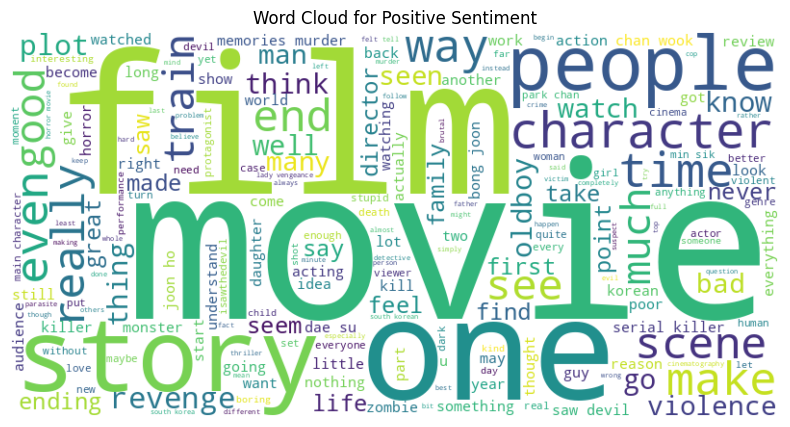

Top Words for Positive Sentiment:
i: 5773
movie: 4971
the: 3976
film: 3635
one: 1808
it: 1539
like: 1378
time: 1216
this: 1071
character: 1052


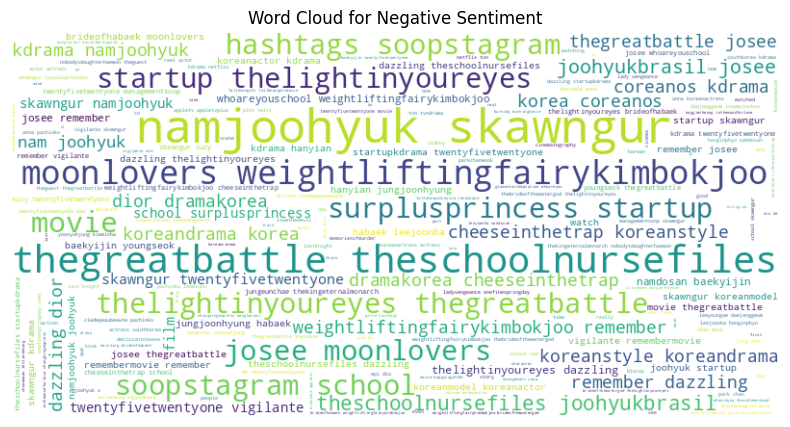

Top Words for Negative Sentiment:
skawngur: 886
thegreatbattle: 777
twentyfivetwentyone: 709
josee: 608
movie: 600
remember: 592
kdrama: 582
namjoohyuk: 569
dazzling: 556
thelightinyoureyes: 548


In [ ]:
#Word Cloud based on sentiment Label
#Conclusion: Seems like -ve a lot of actors name
from collections import Counter

sentiment_mapping = {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiments = data['label'].unique()
for sentiment in sentiments:
    sentiment_label = sentiment_mapping[sentiment]
    text = ' '.join(data[data['label'] == sentiment]['Content_clean'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_label.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

    words = text.split()
    word_freq = Counter(words)
    top_words = word_freq.most_common(10)
    print(f"Top Words for {sentiment_label.capitalize()} Sentiment:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


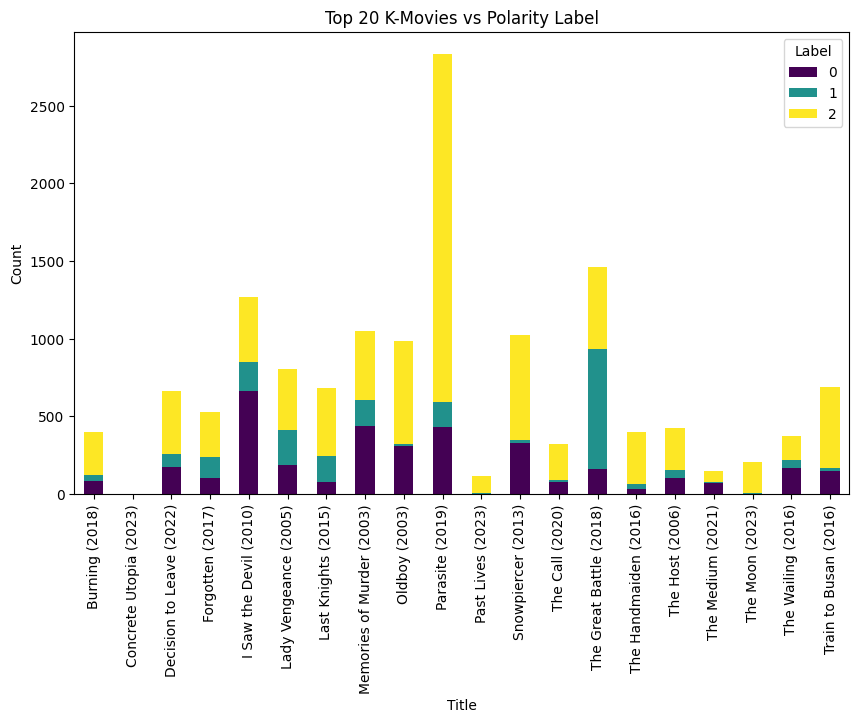

In [ ]:
counts = data.groupby(['Title', 'label']).size().unstack(fill_value=0)

ax = counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
ax.set_ylabel('Count')
ax.set_xlabel('Title')
ax.set_title('Top 20 K-Movies vs Polarity Label')
ax.legend(title='Label')

plt.show()

In [ ]:
data.head()

,Title,review,Content_clean,label,aspect
0,Burning (2018),"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ...",burning fipresci prize winning film south korea mysterious quality romantic drama thriller also ...,2,quality mysterious thriller romantic film understated moment simple solution simple solution str...
1,Burning (2018),"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p...",jeon jong seo play hae mi really beautiful moment film including pantomime routine mimicking gre...,2,film beautiful routine pantomime hunger great concept poetic people young parent difficult world...
2,Burning (2018),"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A...",based short story barn burning haruki murakami paju south korea jong su yoo ah young aspiring wr...,2,story short writer young job odd classmate former character unusual path mysterious hour half po...
3,Burning (2018),It's the rare film that gets its value upon reflection rather than during watching. It's not bor...,it rare film get value upon reflection rather watching it boring extremely long runtime generall...,2,film rare runtime long risk dull mystery pure progress narrative intrigue intriguing finale last...
4,Burning (2018),Wow. Didn't do it for me. Characters were bland. Story was bland. Pacing was plodding and slow. ...,wow didn characters bland story bland pacing plodding slow i know i going grain something defini...,2,


In [ ]:
def get_aspects_(x):
  list1=x.split(' ')
  aspects=[]
  for i in range(len(list1)):
    if i %2==0:
      aspects.append(list1[i])
  return aspects

In [ ]:
data['aspects']=data['aspect'].apply(get_aspects_)
data.head(10)

,Title,review,Content_clean,label,aspect,aspects
0,Burning (2018),"Burning, the 2018 FIPRESCI Prize-winning film from South Korea, has a mysterious quality to it, ...",burning fipresci prize winning film south korea mysterious quality romantic drama thriller also ...,2,quality mysterious thriller romantic film understated moment simple solution simple solution str...,"[quality, thriller, film, moment, solution, solution, significance, truth, state, theme, viewing..."
1,Burning (2018),"Jeon Jong-seo (who plays Hae-Mi) has some really beautiful moments in this film, including her p...",jeon jong seo play hae mi really beautiful moment film including pantomime routine mimicking gre...,2,film beautiful routine pantomime hunger great concept poetic people young parent difficult world...,"[film, routine, hunger, concept, people, parent, world, moment, moment, reflection, tower, analo..."
2,Burning (2018),"Based on the short story ""Barn Burning"" by Haruki Murakami: in Paju, South Korea, Jong-su (Yoo A...",based short story barn burning haruki murakami paju south korea jong su yoo ah young aspiring wr...,2,story short writer young job odd classmate former character unusual path mysterious hour half po...,"[story, writer, job, classmate, character, path, hour, point, point, film, uniqueness, way, web,..."
3,Burning (2018),It's the rare film that gets its value upon reflection rather than during watching. It's not bor...,it rare film get value upon reflection rather watching it boring extremely long runtime generall...,2,film rare runtime long risk dull mystery pure progress narrative intrigue intriguing finale last...,"[film, runtime, risk, mystery, progress, intrigue, finale, experience, thing, thing, spectator, ..."
4,Burning (2018),Wow. Didn't do it for me. Characters were bland. Story was bland. Pacing was plodding and slow. ...,wow didn characters bland story bland pacing plodding slow i know i going grain something defini...,2,,[]
5,Burning (2018),Korean cinema produces highlights that quite a lot of people are not aware of. Landing Steven Ye...,korean cinema produce highlight quite lot people aware landing steven yeun internationally known...,2,produce korean digest easy character slow theme difficult director latter director true idea cle...,"[produce, digest, character, theme, director, director, idea, mystery, mystery, mystery]"
6,Burning (2018),"Thanks to the quarantine, I finally saw ""Burning"". What a long and overrated movie! Based on a J...",thanks quarantine i finally saw burning what long overrated movie based japanese short story bad...,2,movie overrated story short film japanese film bad moment directorial performance good mystery a...,"[movie, story, film, film, moment, performance, mystery, clich, boy, family, pretension, novel, ..."
7,Burning (2018),"After an 8-year hiatus, South Korean auteur Lee Chang-dong returns with a bang! BURNING, his six...",after year hiatus south korean auteur lee chang dong return bang burning sixth feature slow burn...,2,feature sixth drama slow job odd boy cute boy awkward girl proactive move first narrative detail...,"[feature, drama, job, boy, boy, girl, move, narrative, hae, theory, theory, theory, shower, trip..."
8,Burning (2018),BURNING is another Korean thriller with arthouse sensibilities that falls down due to the basic ...,burning another korean thriller arthouse sensibility fall due basic premise what mystery focused...,2,sensibility korean premise due premise basic character main point main hour first end restless a...,"[sensibility, premise, premise, character, point, hour, end, attention, length, performance, end]"
9,Burning (2018),I found this to be perhaps the most suspenseful film of the year so far. That suspense is not th...,i found perhaps suspenseful film year far that suspense usual type found regular horror thriller...,2,year suspenseful type usual film regular ambiguity darker thing whole perception open role easy,"[year, type, film, ambiguity, thing, percep

In [ ]:
#Data Balancing

df=data[['Content_clean','aspect','label']].dropna()
class_counts = df['label'].value_counts()

#Choose 4000 for each
n = 4000
balanced_df = pd.DataFrame(columns=df.columns)

for label, count in class_counts.items():
    if count > n:
        # Under Sampling
        sampled_data = resample(df[df['label'] == label], replace=False, n_samples=n, random_state=42)
    elif count < n:
        # Over Sampling
        sampled_data = resample(df[df['label'] == label], replace=True, n_samples=n, random_state=42)
    else:
        # Remained
        sampled_data = df[df['label'] == label]

    balanced_df = pd.concat([balanced_df, sampled_data])

In [ ]:
balanced_df['label'].value_counts()

2    4000
0    4000
1    4000
Name: label, dtype: int64

In [ ]:
print(balanced_df .shape)
balanced_df.to_json("/content/drive/MyDrive/ABSA_FYP_V3/balanced_data.json", orient="records", lines=True)

(12000, 3)


In [ ]:
df = pd.read_json('/content/drive/MyDrive/ABSA_FYP_V3/balanced_data.json', lines=True)

df.head()

,Content_clean,aspect,label
0,heojil kyolshim decision leave pretty new south korean live action movie also korean language ev...,action live movie new movie korean language korean inclusion minor wook newest filmmaker success...,2
1,loved movie awesome twist,,2
2,there hundred language around world smile speaks namjoohyuk twentyfivetwentyone netflix netflixk...,,2
3,huge oscar winner what joke there way simply enough convince member family could easily conspire...,winner huge family enough scam big family rich majority mass class upper class rich opportunity ...,2
4,while many similar component zombie movie stand beyond the acting good storyline exceptional cin...,movie many movie similar,2


In [ ]:
#Check first data df aspect, take array index 1 as example
len(df['aspect'][1].split(' '))

1

In [ ]:
def get_aspects_(x):
  list1=x.split(' ')
  aspects=[]
  for i in range(len(list1)):
    if i %2==0:
      aspects.append(list1[i])
  return aspects

In [ ]:
df['aspects']=df['aspect'].apply(get_aspects_)
df.head(10)

,Content_clean,aspect,label,aspects
0,heojil kyolshim decision leave pretty new south korean live action movie also korean language ev...,action live movie new movie korean language korean inclusion minor wook newest filmmaker success...,2,"[action, movie, movie, language, inclusion, wook, filmmaker, filmmaker, time, occasion, screenpl..."
1,loved movie awesome twist,,2,[]
2,there hundred language around world smile speaks namjoohyuk twentyfivetwentyone netflix netflixk...,,2,[]
3,huge oscar winner what joke there way simply enough convince member family could easily conspire...,winner huge family enough scam big family rich majority mass class upper class rich opportunity ...,2,"[winner, family, scam, family, majority, class, class, opportunity, self, self, class, class, ti..."
4,while many similar component zombie movie stand beyond the acting good storyline exceptional cin...,movie many movie similar,2,"[movie, movie]"
5,with zero advertisement theatrical release speak canada us i saw foreign box office paid twice m...,release theatrical fi unnoticed fi avid one good concept key concept good actor fantastic actor ...,2,"[release, fi, fi, one, concept, concept, actor, actor, brawling, surprise, train, armement, comp..."
6,decisiontoleave parkchanwook movie newrelease thriller mystery action drama korean kmovies kdram...,kmovies korean,2,[kmovies]
7,i love this movie sm,,2,[]
8,eyyyy ate gracee manang tserimd look weeeee its patwick stahhhhhhfffeeeessshhhhh fatfat patrickp...,time great chefcranemd good,2,"[time, chefcranemd]"
9,what got hyped watch movie directed park chan wook he basically quentin tarantino korea creates ...,audience artistic film previous element psychological work previous work different work previous...,2,"[audience, film, element, work, work, work, style, violence, humor, mind, humanity, vibrant, vib..."


In [ ]:
fasttext_model = FastText(df['Content_clean'].values.tolist(), vector_size= 100, window=5, min_count=5, workers=4,sg=1)

In [ ]:
all_aspects=[]
all_aspects = df['aspects'].sum()
all_aspects = [keyword for keyword in all_aspects if keyword is not ""]

# count the aspect
element_count = Counter(all_aspects)

# Find the top 10
top_10_elements = element_count.most_common(10)
top_10_elements = [i[0] for i in top_10_elements]

top_10_elements

['movie',
 'film',
 'time',
 'character',
 'story',
 'scene',
 'way',
 'thing',
 'people',
 'family']

In [ ]:
#Positive Top 10 Aspect
positive_aspects=[]
positive_aspects = df[df['label'] == 2]['aspects'].sum()
positive_aspects = [keyword for keyword in positive_aspects if keyword is not ""]

# count the aspect
element_count = Counter(positive_aspects)

# Find the top 10
top_10_elements_positive = element_count.most_common(10)
top_10_elements_positive = [i[0] for i in top_10_elements_positive]

top_10_elements_positive

['movie',
 'film',
 'time',
 'story',
 'character',
 'scene',
 'way',
 'family',
 'thing',
 'people']

In [ ]:
#Negative Top 10 Aspect
negative_aspects=[]
negative_aspects = df[df['label'] == 0]['aspects'].sum()
negative_aspects = [keyword for keyword in negative_aspects if keyword is not ""]

# count the aspect
element_count = Counter(negative_aspects)

# Find the top 10
top_10_elements_negative = element_count.most_common(10)
top_10_elements_negative = [i[0] for i in top_10_elements_negative]

top_10_elements_negative

['movie',
 'film',
 'time',
 'character',
 'scene',
 'story',
 'way',
 'thing',
 'people',
 'man']

In [ ]:
#Neutral Top 10 Aspect
neutral_aspects=[]
neutral_aspects = df[df['label'] == 1]['aspects'].sum()
neutral_aspects = [keyword for keyword in neutral_aspects if keyword is not ""]

# count the aspect
element_count = Counter(neutral_aspects)

# Find the top 10
top_10_elements_neutral = element_count.most_common(10)
top_10_elements_neutral = [i[0] for i in top_10_elements_neutral]

top_10_elements_neutral

['dramakorea',
 'school',
 'remembermovie',
 'theschoolnursefiles',
 'actress',
 'movie',
 'film',
 'pachinko',
 'wongkarwai',
 'moonlovers']

In [ ]:
def get_similarity(text, aspect):
    try:
        return fasttext_model.wv.n_similarity(text, aspect)
    except:
        return 0

In [ ]:
from tqdm import tqdm
tqdm.pandas()
for aspect in top_10_elements:
    df[aspect] = df['Content_clean'].progress_map(lambda text: get_similarity(text, aspect))

df.head()

100%|██████████| 12000/12000 [00:27<00:00, 440.98it/s] 


,Content_clean,aspect,label,aspects,movie,film,time,character,story,scene,way,thing,people,family
0,heojil kyolshim decision leave pretty new south korean live action movie also korean language ev...,action live movie new movie korean language korean inclusion minor wook newest filmmaker success...,2,"[action, movie, movie, language, inclusion, wook, filmmaker, filmmaker, time, occasion, screenpl...",0.891987,0.871697,0.926135,0.953507,0.961631,0.963093,0.871151,0.930345,0.920588,0.944223
1,loved movie awesome twist,,2,[],0.953401,0.899491,0.962348,0.913538,0.924084,0.951286,0.869470,0.907866,0.902799,0.948259
2,there hundred language around world smile speaks namjoohyuk twentyfivetwentyone netflix netflixk...,,2,[],0.890181,0.872126,0.926938,0.954397,0.967267,0.962192,0.882811,0.939988,0.913808,0.947884
3,huge oscar winner what joke there way simply enough convince member family could easily conspire...,winner huge family enough scam big family rich majority mass class upper class rich opportunity ...,2,"[winner, family, scam, family, majority, class, class, opportunity, self, self, class, class, ti...",0.893885,0.872375,0.927662,0.955404,0.961975,0.966406,0.869702,0.928119,0.925071,0.944081
4,while many similar component zombie movie stand beyond the acting good storyline exceptional cin...,movie many movie similar,2,"[movie, movie]",0.901372,0.876162,0.934478,0.949664,0.961440,0.965342,0.878285,0.938187,0.919784,0.946374


**Modelling**

In [ ]:
! pip install transformers[torch]
! pip install transformers
! pip install datasets
! pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.5 MB/s eta 0:00:00


In [ ]:
import time
import torch
import datasets
import numpy as np

from typing import List, Dict
from datasets import load_dataset
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence
from transformers import (AutoTokenizer,
                          AutoModelForSequenceClassification,
                          AutoModelForSeq2SeqLM,
                          DataCollatorForSeq2Seq,
                          Seq2SeqTrainingArguments,
                          Seq2SeqTrainer,
                          BartForConditionalGeneration)
from transformers import Trainer, TrainingArguments
from sklearn.metrics import recall_score, confusion_matrix,f1_score,precision_score,classification_report

In [ ]:
dataset = load_dataset('json', data_files='/content/drive/MyDrive/ABSA_FYP_V3/balanced_data.json')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 12000
    })
})

Evaluation Function

In [ ]:
import evaluate
def compute_metrics(eval_pred):
    f1_score = evaluate.load("f1")
    acc=evaluate.load("accuracy")
    pre=evaluate.load("precision")
    recall=evaluate.load("recall")
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    f1_score.add_batch(predictions=predictions, references=labels)
    acc.add_batch(predictions=predictions, references=labels)
    pre.add_batch(predictions=predictions, references=labels)
    recall.add_batch(predictions=predictions, references=labels)
    return {'f1':f1_score.compute(average='weighted')['f1'],'acc':acc.compute()['accuracy'],
            'precision':pre.compute(average='weighted')['precision'],'recall':recall.compute(average='weighted')['recall']}


In [ ]:
def data_convert(y):
    K = len(np.unique(y.tolist()))
    eyes_mat = np.eye(K)
    y_onehot = np.zeros((y.shape[0], K))
    for i in range(0, y.shape[0]):
        y_onehot[i] = eyes_mat[y[i]]
    return y_onehot
def roc_auc_curve(y_onehot, y_score):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  n_classes=3
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_onehot[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

      plt.figure()
      lw = 2
      plt.plot(fpr[i], tpr[i], color='darkorange',
                lw=lw, label='ROC curve (area = %0.4f)' % roc_auc[i])
      plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
      plt.xlim([0.0, 1.0])
      plt.ylim([0.0, 1.05])
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('class '+str(i))
      plt.legend(loc="lower right")
      plt.show()

def evaluate_result(test_labels, test_predictions,y_score):

  # Calculate the confusion matrix
  cm = confusion_matrix(test_labels, test_predictions)

  # Plot the confusion matrix
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, square=True)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

  y_onehot=data_convert(np.array(test_labels))
  roc_auc_curve(y_onehot, y_score)

  # Output the classification report
  target_names = ['Negative', 'Neutral','Positive']
  classification_rep = classification_report(test_labels, test_predictions, target_names=target_names)
  print('Classification Report:\n', classification_rep)

BERT

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=3)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Top 10 Aspect, positive, negative, neutral
def preprocess_function(batch):
    return tokenizer(batch["Content_clean"], batch["aspect"], truncation=True, padding="max_length")


tokenized_data = dataset.map(preprocess_function, batched=True)
print(tokenized_data)

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12000
    })
})


In [ ]:
train_dataset, valid_dataset =dataset['train'].train_test_split(test_size=0.2, shuffle=True, seed=42).values()
dataset1 = datasets.DatasetDict({"train": train_dataset, "validation": valid_dataset})
tokenized_data = dataset1.map(preprocess_function, batched=True)
print(dataset1)

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 2400
    })
})


In [ ]:
!pip install transformers[torch]
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/ABSA_FYP_V3/BERT",  # output directory
    num_train_epochs=2,  # total # of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=64,  # batch size for evaluation
    warmup_steps=500,  # number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # strength of weight decay
    learning_rate=2e-5,  # learning rate
    save_total_limit=2,  # limit the total amount of checkpoints, delete the older checkpoints
    logging_dir="/content/drive/MyDrive/ABSA_FYP_V3/BERT/logs",  # directory for storing logs
    logging_steps=100,
    evaluation_strategy="steps",
    eval_steps=200,
    save_strategy="steps",
    save_steps=500,
)

trainer = Trainer(
    model=model,  # the instantiated Transformers model to be trained
    args=training_args,  # training arguments, defined above
    train_dataset=tokenized_data["train"],  # training dataset
    eval_dataset=tokenized_data["validation"],  # evaluation dataset
    compute_metrics=compute_metrics,  # the callback that computes metrics of interest
)

In [ ]:
# Measure training time
start_time = time.time()
trainer.train()
end_time = time.time()
training_time = end_time - start_time

Step,Training Loss,Validation Loss


In [ ]:
# Get training loss and evaluation metrics
eval_metrics = trainer.evaluate()

# Get GPU memory usage
gpu_memory_usage = torch.cuda.max_memory_allocated()

# Print results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Evaluation Metrics: {eval_metrics}")
print(f"GPU Memory Usage: {gpu_memory_usage / 1024**2:.2f} MB")

In [ ]:
trainer.save_model("/content/drive/MyDrive/ABSA_FYP_V3/BERT")

In [ ]:
model_BERT = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/ABSA_FYP_V3/BERT", num_labels=3)
model_BERT = model_BERT.to("cuda")

y_true=[]
pred=[]
count=0
probas=[]
for i in tokenized_data["validation"]:
  text1,aspect1=i['Content_clean'],i['aspect']
  inputs1 = tokenizer(text1,aspect1,truncation=True,padding="max_length", return_tensors="pt").to(model_BERT.device)
  outputs = model_BERT(**inputs1).logits
  prediction=outputs.argmax().item()
  proba=torch.softmax(outputs,axis=1).data.cpu().numpy().tolist()[0]
  probas.append(proba)
  #print(prediction)
  pred.append(prediction)
  y_true.append(i['label'])
  count+=1
  print(count)

In [ ]:
evaluate_result(y_true, pred,np.array(probas))

ROBERTA

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base")
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def preprocess_function(batch):
    return tokenizer(batch["Content_clean"], batch["aspect"], truncation=True, padding="max_length")

tokenized_data = dataset.map(preprocess_function, batched=True)
print(tokenized_data)

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label', 'input_ids', 'attention_mask'],
        num_rows: 12000
    })
})


In [ ]:
train_dataset, valid_dataset =dataset['train'].train_test_split(test_size=0.2, shuffle=True, seed=42).values()
dataset1 = datasets.DatasetDict({"train": train_dataset, "validation": valid_dataset})
tokenized_data = dataset1.map(preprocess_function, batched=True)
print(dataset1)

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 2400
    })
})


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/ABSA_FYP_V3/ROBERTA",  # output directory
    num_train_epochs=2,  # total # of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=64,  # batch size for evaluation
    warmup_steps=500,  # number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # strength of weight decay
    learning_rate=2e-5,  # learning rate
    save_total_limit=2,  # limit the total amount of checkpoints, delete the older checkpoints
    logging_dir="/content/drive/MyDrive/ABSA_FYP_V3/ROBERTA/logs",  # directory for storing logs
    logging_steps=100,
    evaluation_strategy="steps",
    eval_steps=200,
    save_strategy="steps",
    save_steps=500,
)

trainer = Trainer(
    model=model,  # the instantiated Transformers model to be trained
    args=training_args,  # training arguments, defined above
    train_dataset=tokenized_data["train"],  # training dataset
    eval_dataset=tokenized_data["validation"],  # evaluation dataset
    compute_metrics=compute_metrics,  # the callback that computes metrics of interest
)

In [ ]:
start_time = time.time()
trainer.train()
end_time = time.time()
training_time = end_time - start_time

#Convert the result to Precentage.

Step,Training Loss,Validation Loss,F1,Acc,Precision,Recall
200,0.900600,0.807230,0.523741,0.603750,0.673672,0.603750
400,0.677300,0.563125,0.777323,0.777917,0.803114,0.777917
600,0.560700,0.553025,0.792030,0.792083,0.810540,0.792083
800,0.447300,0.542840,0.849315,0.850000,0.862688,0.850000
1000,0.471300,0.392851,0.887795,0.887917,0.891187,0.887917
1200,0.427800,0.340179,0.895397,0.895000,0.898156,0.895000
1400,0.357800,0.419614,0.894151,0.894167,0.900068,0.894167
1600,0.371200,0.334715,0.901155,0.900833,0.903059,0.900833
1800,0.365200,0.326712,0.912746,0.912500,0.913304,0.912500
2000,0.345300,0.319430,0.920160,0.920000,0.921147,0.920000


In [ ]:
# Get training loss and evaluation metrics
eval_metrics = trainer.evaluate()

# Get GPU memory usage
gpu_memory_usage = torch.cuda.max_memory_allocated()

# Print results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Evaluation Metrics: {eval_metrics}")
print(f"GPU Memory Usage: {gpu_memory_usage / 1024**2:.2f} MB")

Training Time: 2747.38 seconds
Evaluation Metrics: {'eval_loss': 0.3386912941932678, 'eval_f1': 0.9222265076936137, 'eval_acc': 0.9220833333333334, 'eval_precision': 0.9234589044388551, 'eval_recall': 0.9220833333333334, 'eval_runtime': 80.0354, 'eval_samples_per_second': 29.987, 'eval_steps_per_second': 0.475, 'epoch': 2.0}
GPU Memory Usage: 7496.75 MB


In [ ]:
trainer.save_model("/content/drive/MyDrive/ABSA_FYP_V3/ROBERTA")

In [ ]:
model_ROBERTA = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/ABSA_FYP_V3/ROBERTA", num_labels=3)
model_ROBERTA = model_ROBERTA.to("cuda")

y_true=[]
pred=[]
count=0
probas=[]
for i in tokenized_data["validation"]:
  text1,aspect1=i['Content_clean'],i['aspect']
  inputs1 = tokenizer(text1,aspect1,truncation=True,padding="max_length", return_tensors="pt").to(model_ROBERTA.device)
  outputs = model_ROBERTA(**inputs1).logits
  prediction=outputs.argmax().item()
  proba=torch.softmax(outputs,axis=1).data.cpu().numpy().tolist()[0]
  probas.append(proba)
  #print(prediction)
  pred.append(prediction)
  y_true.append(i['label'])
  count+=1
  print(count)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


Feedback
1. EDA - Check balance data
2. Balance data - SMOTE
3. BERT, ROBERTA, ALBERT
4. Why the epod is xxx. Why you choose this value?
5. Check overfitting

Discussion:
Bert is more stable.
Achieve similar result. Find a paper, these 3 provide different result.
Discuss Time taken, Performance.

2 More Graph to check for the over fitting.
97% is overfitting.


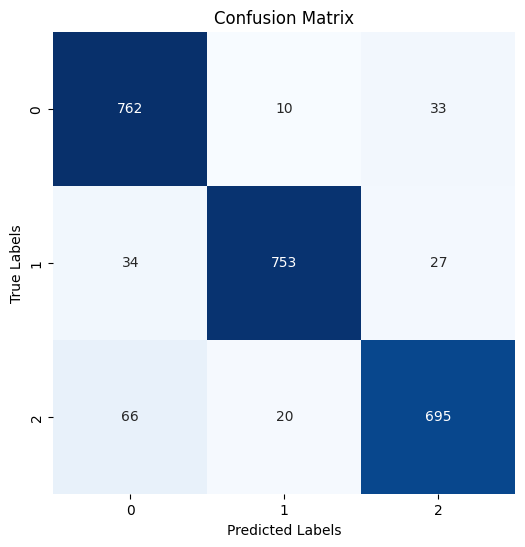

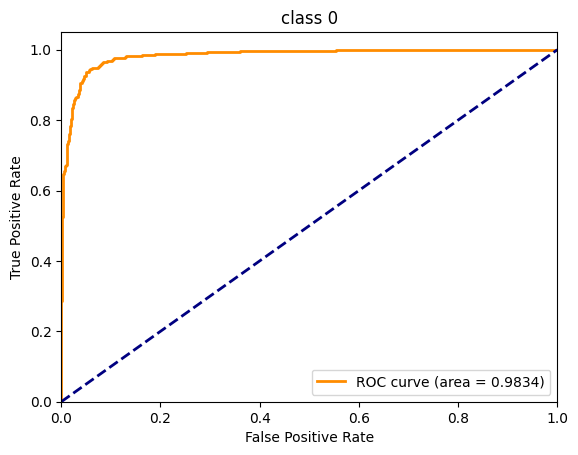

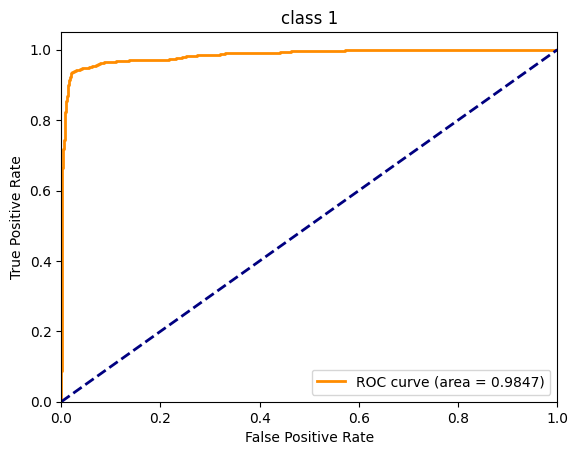

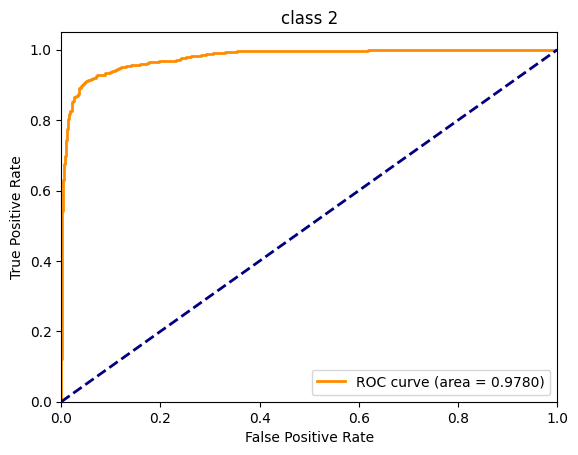

Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.95      0.91       805
     Neutral       0.96      0.93      0.94       814
    Positive       0.92      0.89      0.90       781

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



In [ ]:
evaluate_result(y_true, pred,np.array(probas))
#Feedback: Check for overfitting

ALBERT

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("albert-base-v2")
model = AutoModelForSequenceClassification.from_pretrained("albert-base-v2", num_labels=3)

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def preprocess_function(batch):
    return tokenizer(batch["Content_clean"], batch["aspect"], truncation=True, padding="max_length")

tokenized_data = dataset.map(preprocess_function, batched=True)
print(tokenized_data)

Map:   0%|          | 0/12000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 12000
    })
})


In [ ]:
train_dataset, valid_dataset =dataset['train'].train_test_split(test_size=0.2, shuffle=True, seed=42).values()
dataset1 = datasets.DatasetDict({"train": train_dataset, "validation": valid_dataset})
tokenized_data = dataset1.map(preprocess_function, batched=True)
print(dataset1)

Map:   0%|          | 0/9600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['Content_clean', 'aspect', 'label'],
        num_rows: 2400
    })
})


In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/ABSA_FYP_V3/ALBERT",  # output directory
    num_train_epochs=2,  # total # of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=64,  # batch size for evaluation
    warmup_steps=500,  # number of warmup steps for learning rate scheduler
    weight_decay=0.01,  # strength of weight decay
    learning_rate=2e-5,  # learning rate
    save_total_limit=2,  # limit the total amount of checkpoints, delete the older checkpoints
    logging_dir="/content/drive/MyDrive/ABSA_FYP_V3/ALBERT/logs",  # directory for storing logs
    logging_steps=100,
    evaluation_strategy="steps",
    eval_steps=200,
    save_strategy="steps",
    save_steps=500,
)

trainer = Trainer(
    model=model,  # the instantiated Transformers model to be trained
    args=training_args,  # training arguments, defined above
    train_dataset=tokenized_data["train"],  # training dataset
    eval_dataset=tokenized_data["validation"],  # evaluation dataset
    compute_metrics=compute_metrics,  # the callback that computes metrics of interest
)

In [ ]:
start_time = time.time()
trainer.train()
end_time = time.time()
training_time = end_time - start_time

Step,Training Loss,Validation Loss,F1,Acc,Precision,Recall
200,0.847100,0.773231,0.541286,0.617500,0.722526,0.617500
400,0.585500,0.522374,0.817072,0.816250,0.818845,0.816250
600,0.540300,0.402213,0.880248,0.880000,0.881892,0.880000
800,0.469900,0.500559,0.868063,0.868750,0.868572,0.868750
1000,0.437100,0.357385,0.890635,0.890417,0.891006,0.890417
1200,0.473800,0.325025,0.903258,0.903333,0.904677,0.903333
1400,0.446600,0.425790,0.908434,0.908333,0.909205,0.908333
1600,0.443400,0.358476,0.909699,0.909583,0.910528,0.909583
1800,0.389300,0.365545,0.913216,0.912917,0.913973,0.912917
2000,0.350500,0.383613,0.913212,0.912917,0.915049,0.912917


In [ ]:
# Get training loss and evaluation metrics
eval_metrics = trainer.evaluate()

# Get GPU memory usage
gpu_memory_usage = torch.cuda.max_memory_allocated()

# Print results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Evaluation Metrics: {eval_metrics}")
print(f"GPU Memory Usage: {gpu_memory_usage / 1024**2:.2f} MB")

Training Time: 2950.40 seconds
Evaluation Metrics: {'eval_loss': 0.34156444668769836, 'eval_f1': 0.9239282406849816, 'eval_acc': 0.92375, 'eval_precision': 0.9242695014007594, 'eval_recall': 0.92375, 'eval_runtime': 92.4107, 'eval_samples_per_second': 25.971, 'eval_steps_per_second': 0.411, 'epoch': 2.0}
GPU Memory Usage: 7496.75 MB


In [ ]:
trainer.save_model("/content/drive/MyDrive/ABSA_FYP_V3/ALBERT")

In [ ]:
model_ALBERT = AutoModelForSequenceClassification.from_pretrained("/content/drive/MyDrive/ABSA_FYP_V3/ALBERT", num_labels=3)
model_ALBERT = model_ALBERT.to("cuda")

y_true=[]
pred=[]
count=0
probas=[]
for i in tokenized_data["validation"]:
  text1,aspect1=i['Content_clean'],i['aspect']
  inputs1 = tokenizer(text1,aspect1,truncation=True,padding="max_length", return_tensors="pt").to(model_ALBERT.device)
  outputs = model_ALBERT(**inputs1).logits
  prediction=outputs.argmax().item()
  proba=torch.softmax(outputs,axis=1).data.cpu().numpy().tolist()[0]
  probas.append(proba)
  #print(prediction)
  pred.append(prediction)
  y_true.append(i['label'])
  count+=1

print(count)

2400


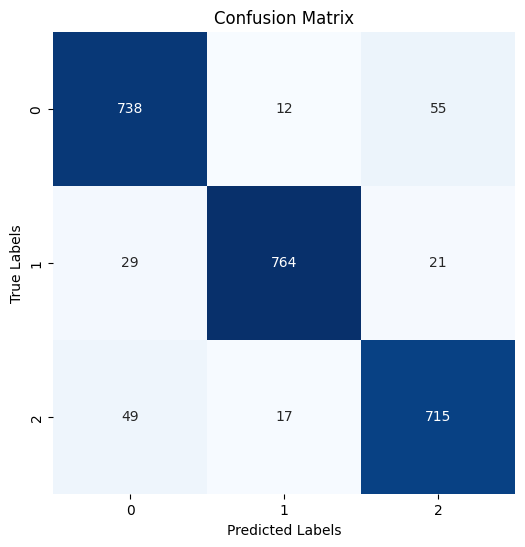

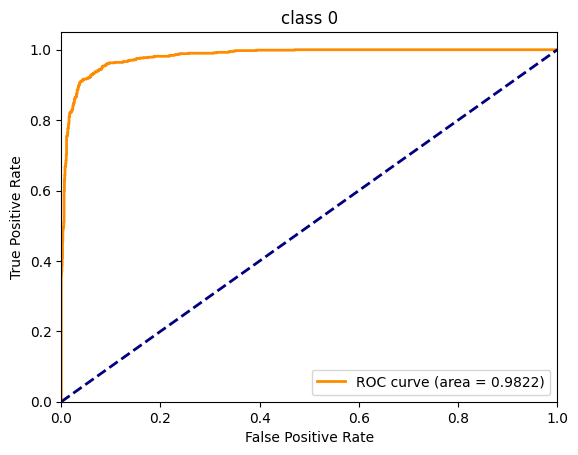

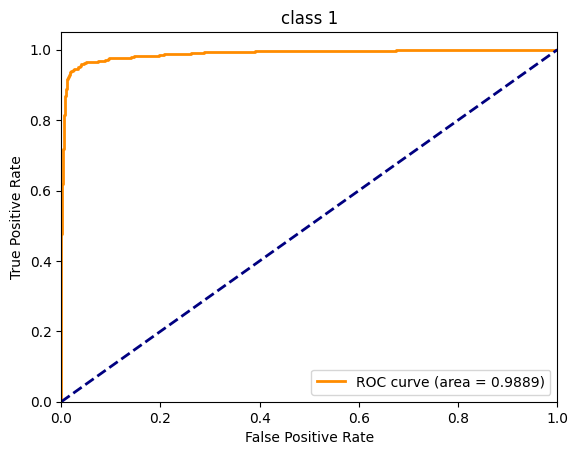

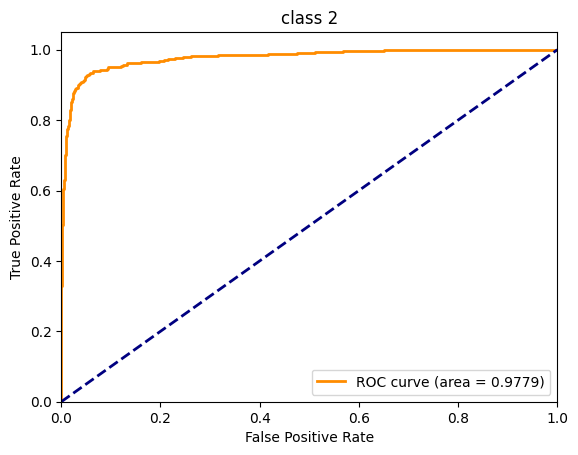

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.92      0.91       805
     Neutral       0.96      0.94      0.95       814
    Positive       0.90      0.92      0.91       781

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



In [ ]:
evaluate_result(y_true, pred,np.array(probas))

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.9 MB/s eta 0:00:00


Others Code

In [ ]:
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define the input text
text = "The movie story is great, but the actors acting skill is awkward"

# Process the text with spaCy to tokenize, perform part-of-speech tagging, and parse dependencies
doc = nlp(text)

# Initialize lists to store tokens, tags, polarities, and aspects
tokens = []
tags = []
polarities = []
aspects = []

# Define a function to map spaCy's part-of-speech tags to polarities
def map_polarity(tag, token_text):
    if tag in ["VERB", "ADJ", "ADV"]:
        # Use VADER to determine the sentiment scores
        sentiment_scores = analyzer.polarity_scores(token_text)
        positive_score = sentiment_scores['pos']
        negative_score = sentiment_scores['neg']

        # Map scores to polarities
        if positive_score == 1:
            return 1
        elif negative_score == 1:
            return -1
        else:
            return 0
    elif tag in ["NOUN"]:
        return 0  # Neutral polarity for nouns
    else:
        return 0

# Initialize variables to track the current aspect and sentiment
current_aspect = None
current_sentiment = None

# Iterate through tokens and assign tags, polarities, and aspects
for token in doc:
    tokens.append(token.text)
    tags.append(token.pos_)
    polarity = map_polarity(token.pos_, token.text)
    polarities.append(polarity)

    if current_aspect is None and token.pos_ == 'NOUN':
        current_aspect = token.text
    elif current_aspect is not None and token.pos_ == 'ADJ':
        current_sentiment = token.text
        sentiment = "positive" if polarity == 1 else "negative"
        aspect_sentiment = {current_aspect: f"{current_sentiment}, {sentiment}"}
        aspects.append(aspect_sentiment)
        current_aspect = None
        current_sentiment = None

# Print the formatted output including aspects and their polarities
print("Tokens:", tokens)
print("Tags:", tags)
print("Polarities:", polarities)
print("Aspects:", aspects)

# Render dependency parse tree for visualization
spacy.displacy.render(doc, style='dep', jupyter=True)

Tokens: ['The', 'movie', 'story', 'is', 'great', ',', 'but', 'the', 'actors', 'is', 'hard', 'to', 'comment']
Tags: ['DET', 'NOUN', 'NOUN', 'AUX', 'ADJ', 'PUNCT', 'CCONJ', 'DET', 'NOUN', 'AUX', 'ADJ', 'PART', 'VERB']
Polarities: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1, 0, 0]
Aspects: [{'movie': 'great, positive'}, {'actors': 'hard, negative'}]
